In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('../Datasets/cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('../Datasets/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

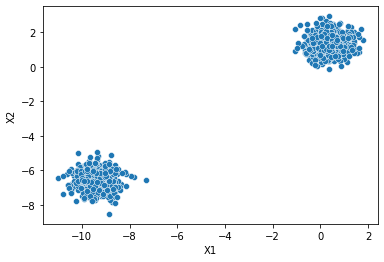

In [4]:
#plot two_blobs
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

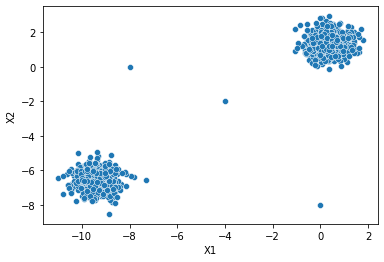

In [5]:
#plot two_blobs_outliers
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [10]:
def display_classification(model,data):
    label = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=label,palette='Set1')

## DBSCAN Clutering

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
model = DBSCAN()

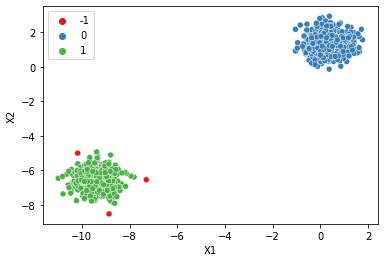

In [13]:
display_classification(model,two_blobs)

In [14]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

#to fix this outlier. We have to give one parameter i.e eps

|  eps : float, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

In [19]:
model = DBSCAN(eps=0.7)

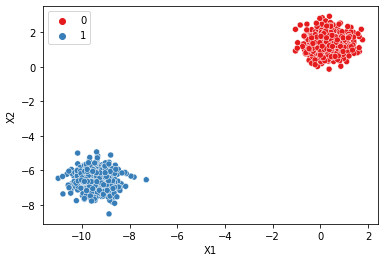

In [20]:
# here using eps=0.7 we can classify the model into two label.
display_classification(model,two_blobs)

In [21]:
#two_blobs_outlier
model = DBSCAN()

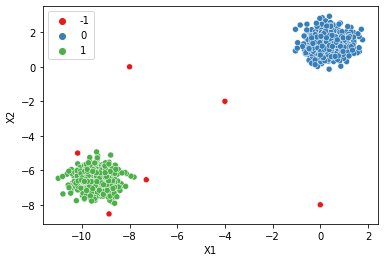

In [22]:
display_classification(model,two_blobs_outliers)

#### 
here we have challenge to find out actual outlier from the dataset.We have to give eps value as an parameter so that our model can find out the oulier and classify the appropiate labels

In [46]:
outlier_model = DBSCAN(eps=0.7,min_samples=10)
outlier_model.fit(two_blobs_outliers)

DBSCAN(eps=0.7, min_samples=10)

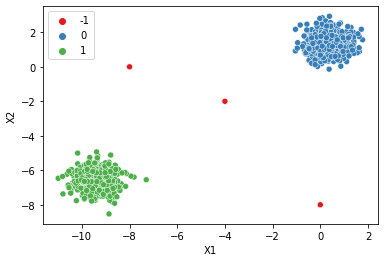

In [47]:
display_classification(outlier_model,two_blobs_outliers)

In [48]:
outlier_model.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [49]:
np.unique(outlier_model.labels_)

array([-1,  0,  1], dtype=int64)

### calculate percent of outliers


In [51]:
np.sum(outlier_model.labels_==-1)

3

In [53]:
np.sum(outlier_model.labels_==-1)/len(outlier_model.labels_) * 100

0.29910269192422734

## plot best eps values for model

In [54]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

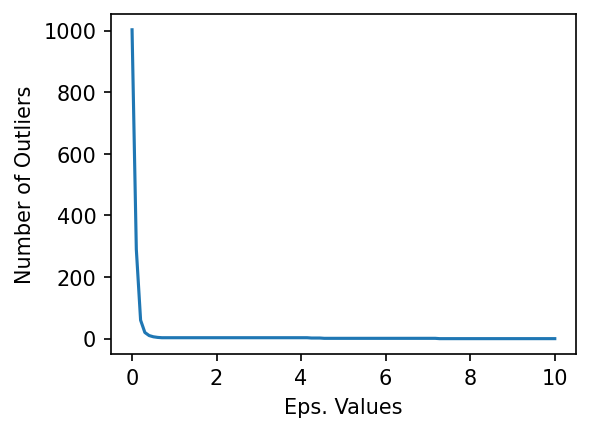

In [60]:
#number of outliers w.r.t eps values
plt.figure(figsize=(4,3),dpi=150)
plt.plot(np.linspace(0.001,10,100),number_of_outliers)
plt.xlabel('Eps. Values')
plt.ylabel('Number of Outliers')
plt.show()

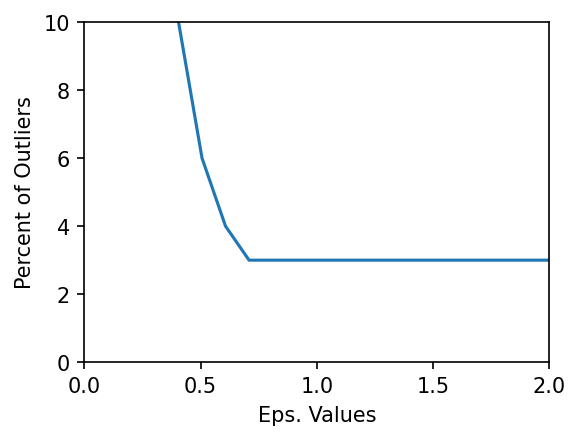

In [63]:
#number of outliers w.r.t eps values
plt.figure(figsize=(4,3),dpi=150)
plt.plot(np.linspace(0.001,10,100),number_of_outliers)
plt.xlabel('Eps. Values')
plt.ylabel('Percent of Outliers')
plt.xlim(0,2)
plt.ylim(0,10)
plt.show()

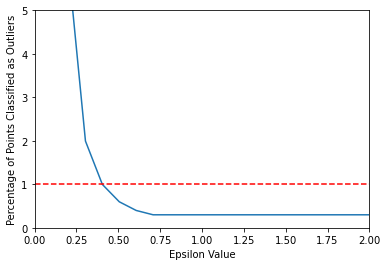

In [64]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

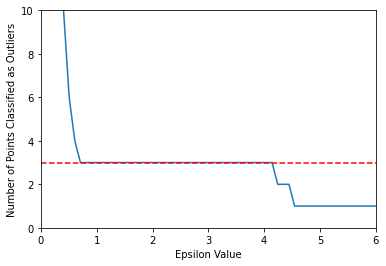

In [65]:
#
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')